In [16]:
from __future__ import division, print_function

import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

#### Критерии качества разбиения в задаче классификации

/Users/olga/Projects/Extruder/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/Users/olga/Projects/Extruder/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


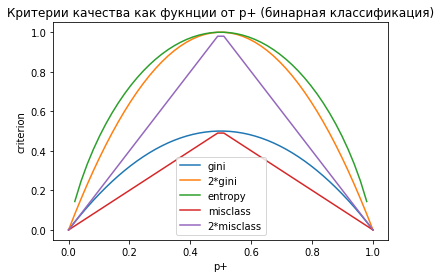

In [17]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50) # 50 чисел от 0 до 1 включительно

plt.plot(xx, [2 * x *(1 - x) for x in xx], label='gini')
plt.plot(xx, [4 * x *(1 - x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1 - x) for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1 - x) for x in xx], label='misclass')
plt.plot(xx, [2 - 2*max(x, 1 - x) for x in xx], label='2*misclass')

plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Критерии качества как фукнции от p+ (бинарная классификация)')
plt.legend()

Рассмотрим пример применения дерева решений из библиотеки Scikit-learn для синтетических данных. Два класса будут сгенерированы из двух нормальных распределений с разными средними.

In [18]:
# первый класс
np.seed = 7
train_data = np.random.normal(size=(100,2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100,2), loc=2)] # loc - среднее, r_ - делает конкатенацию в строки
train_labels = np.r_[train_labels, np.ones(100)]

In [19]:
print(train_data.shape)
print(train_data)

(200, 2)
[[ 2.34465685e+00  6.01056306e-01]
 [ 1.88399506e+00  1.69184763e+00]
 [ 7.11497828e-01  2.46597945e-01]
 [-2.27602173e+00 -7.48121865e-01]
 [ 9.12401229e-01  5.19136094e-01]
 [ 9.38704399e-01  1.51415764e+00]
 [-5.67770857e-01 -6.20394420e-01]
 [ 1.01843513e-01 -3.87748386e-01]
 [ 4.51020459e-01 -3.18162661e-01]
 [-4.26571707e-01  1.00954205e+00]
 [ 1.98755155e+00  6.82164279e-02]
 [-6.33809206e-01 -8.73716685e-01]
 [-5.35883774e-01 -6.49854479e-02]
 [ 3.23504494e-01  4.45580836e-01]
 [-1.42165007e-02 -1.83741509e+00]
 [-6.27753967e-02 -3.72286325e-01]
 [ 4.50270956e-01  1.03341814e+00]
 [-1.34617153e+00  6.29298447e-01]
 [ 2.21372491e-01  1.08210656e+00]
 [-6.92593830e-01  1.94743343e+00]
 [ 1.37579682e+00 -9.13126245e-01]
 [-8.06305491e-01  1.48043983e+00]
 [ 3.90241896e-01  1.55409988e+00]
 [ 1.55462829e-01 -4.80031110e-01]
 [ 2.57906530e-01 -5.19749477e-01]
 [ 3.84331669e-01 -4.09826581e-01]
 [ 3.14161286e-01 -9.10480073e-01]
 [ 1.41058119e+00 -1.32289561e+00]
 [ 4.288633

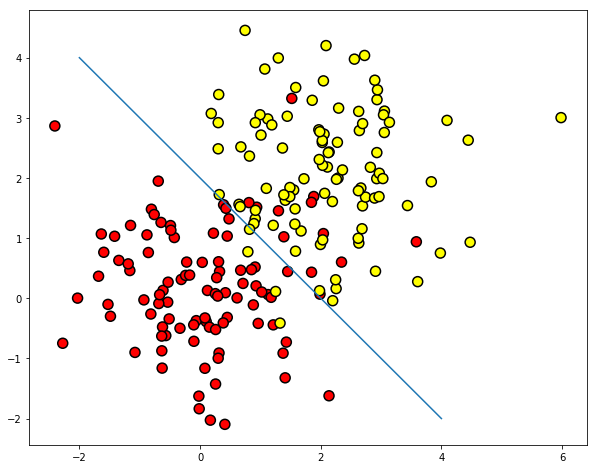

In [20]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
                                                            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot(range(-2,5), range(4,-3,-1))

Попробуем разделить эти два класса, обучив дерево решений. В дереве будем использовать параметр **`max_depth`**, ограничивающий глубину дерева. Визуализируем полученную границу разделения классов.

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)

In [22]:
xx.shape

(856, 1039)

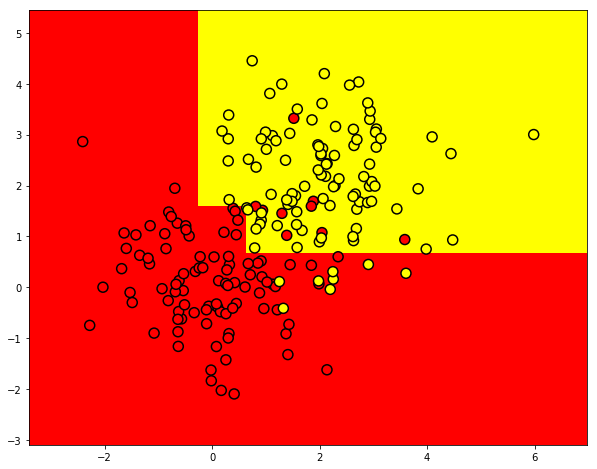

In [23]:
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) # c_ - делает конкатенацию в столбцы, 
                                                # ravel - типа flatten, но не создает копию, а изменяет исходный массив 
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
                                                            cmap='autumn', edgecolors='black', linewidth=1.5)

А как выглядит само построенное дерево? Видим, что дерево "нарезает" пространство на 7 прямоугольников (в дереве 7 листьев). В каждом таком прямоугольнике прогноз дерева будет константным, по превалированию объектов того или иного класса.

In [27]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], out_file='img/small_tree.dot', filled=True)

# # для этого понадобится библиотека pydot (pip install pydot)
import pydot
(graph,) = pydot.graph_from_dot_file('img/small_tree.dot')
graph.write_png('img/small_tree.png')

from IPython.core.display import Image, display
display(Image('img/small_tree.png', unconfined=True))

# dot -Tpng 'img/small_tree.dot' -o 'img/small_tree.png'

TypeError: 'in <string>' requires string as left operand, not int

#### Как дерево решений работает с количественными признаками?

In [28]:
d = {'Возраст': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33], 
     'Невозврат кредита': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]}
data = pd.DataFrame(data=d)

In [29]:
data.sort_values(by='Возраст')

,Возраст,Невозврат кредита
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [30]:
data['Возраст'].values.reshape(-1, 1)

array([[17],
       [64],
       [18],
       [20],
       [38],
       [49],
       [55],
       [25],
       [29],
       [31],
       [33]])

In [31]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Возраст'].values.reshape(-1, 1), data['Невозврат кредита'].values)

export_graphviz(age_tree, feature_names=['Возраст'], out_file='img/age_tree.dot', filled=True)

In [33]:
import pydot
(graph,) = pydot.graph_from_dot_file('img/age_tree.dot')
graph.write_png('img/age_tree.png')

from IPython.core.display import Image, display
display(Image('img/age_tree.png', unconfined=True))

# dot -Tpng age_tree.dot -o img/age_tree.png

TypeError: 'in <string>' requires string as left operand, not int

#### Рассмотрим пример посложнее: добавим признак "Зарплата" (тыс. рублей/месяц).

In [34]:
data['Зарплата'] = [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88]
data

,Возраст,Невозврат кредита,Зарплата
0,17,1,25
1,64,0,80
2,18,1,22
3,20,0,36
4,38,1,37
5,49,0,59
6,55,0,74
7,25,1,70
8,29,1,33
9,31,0,102


Если отсортировать по возрасту, то целевой класс ("Невозврат кредита") меняется (с 1 на 0 или наоборот) 5 раз. А если отсортировать по зарплате – то 7 раз. Как теперь дерево будет выбирать признаки? Посмотрим.

In [35]:
data.sort_values(by='Возраст')

,Возраст,Невозврат кредита,Зарплата
0,17,1,25
2,18,1,22
3,20,0,36
7,25,1,70
8,29,1,33
9,31,0,102
10,33,1,88
4,38,1,37
5,49,0,59
6,55,0,74


In [36]:
data.sort_values(by='Зарплата')

,Возраст,Невозврат кредита,Зарплата
2,18,1,22
0,17,1,25
8,29,1,33
3,20,0,36
4,38,1,37
5,49,0,59
7,25,1,70
6,55,0,74
1,64,0,80
10,33,1,88


In [37]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data[['Зарплата', 'Возраст']].values, data['Невозврат кредита'].values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

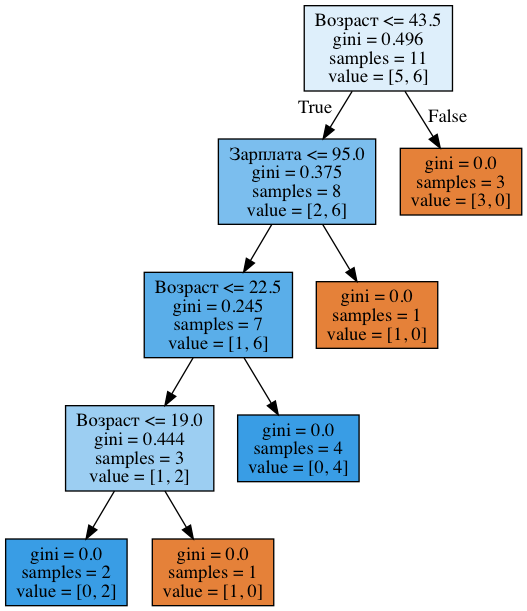

In [80]:
export_graphviz(age_sal_tree, feature_names=['Зарплата', 'Возраст'], out_file='img/age_sal_tree.dot', filled=True)

(graph,) = pydot.graph_from_dot_file('img/age_sal_tree.dot')
graph.write_png('img/age_sal_tree.png')
display(Image('img/age_sal_tree.png', unconfined=True))

#### Дерево решений в задаче регрессии

Сгенерируем данные, распределенные вокруг функции $$f(x)=e^{-x^{2}} + 1.5*e^{{-(x-2)}^2}$$ c некоторым шумом, обучим на них дерево решений и изобразим, какие прогнозы делает дерево.

In [38]:
n_train = 150        
n_test = 1000       
noise = 0.1

In [39]:
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = f(X) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape(n_samples, 1)
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

In [40]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

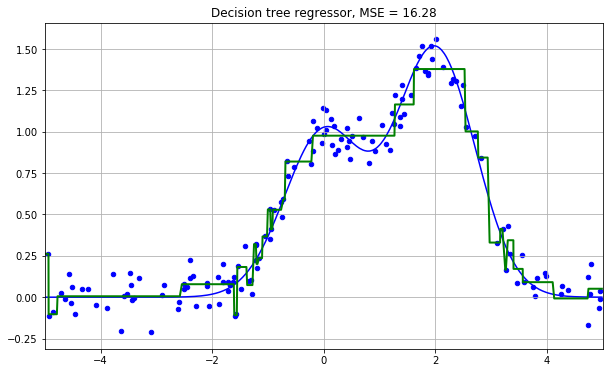

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), 'b')
plt.scatter(X_train, y_train, c='b', s=20)
plt.plot(X_test, reg_tree_pred, 'g', lw=2)

plt.xlim([-5, 5])
plt.title('Decision tree regressor, MSE = %.2f' % np.sum((y_test - reg_tree_pred) ** 2))
plt.grid()

#### Деревья решений и метод ближайших соседей в задаче прогнозирования оттока клиентов телеком-оператора

Считаем данные в DataFrame и проведем предобработку. Штаты пока сохраним в отдельный объект Series, но удалим из датафрейма. Первую модель будем обучать без штатов, потом посмотрим, помогают ли они.

In [42]:
df = pd.read_csv('data/telecom_churn.csv')

df['International plan'] = pd.factorize(df['International plan'])[0] # factorize - бинарный признак в числовой
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

In [43]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [45]:
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3, random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [46]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.94

In [47]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.881

Теперь настроим параметры дерева на кросс-валидации. Настраивать будем максимальную глубину и максимальное используемое на каждом разбиении число признаков. **Суть того, как работает GridSearchCV**: для каждой уникальной пары значений параметров max_depth и max_features будет проведена 5-кратная кросс-валидация и выберется лучшее сочетание параметров.

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
tree_params = {'max_depth': (1, 11), 'max_features': range(4, 19)}

In [50]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [51]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': (1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

#### Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:

In [52]:
tree_grid.best_params_

{'max_depth': 11, 'max_features': 11}

In [53]:
tree_grid.best_score_
# 93% верных ответов на кросс-валидации

0.9322760394342049

In [54]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))
# 92,7% верных ответов на отложенной выборке

0.927

#### Теперь попробуем настроить число соседей в алгоритме kNN.

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [57]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [58]:
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

In [59]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'knn__n_neighbors': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [60]:
knn_grid.best_params_, knn_grid.best_score_ # best_score_ - Mean cross-validated score of the best_estimator 
# 88,6% верных ответов на кросс-валидации

({'knn__n_neighbors': 7}, 0.8859837119588513)

In [61]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))
# 89% верных ответов на отложенной выборке

0.89

Нарисуем получившееся дерево.

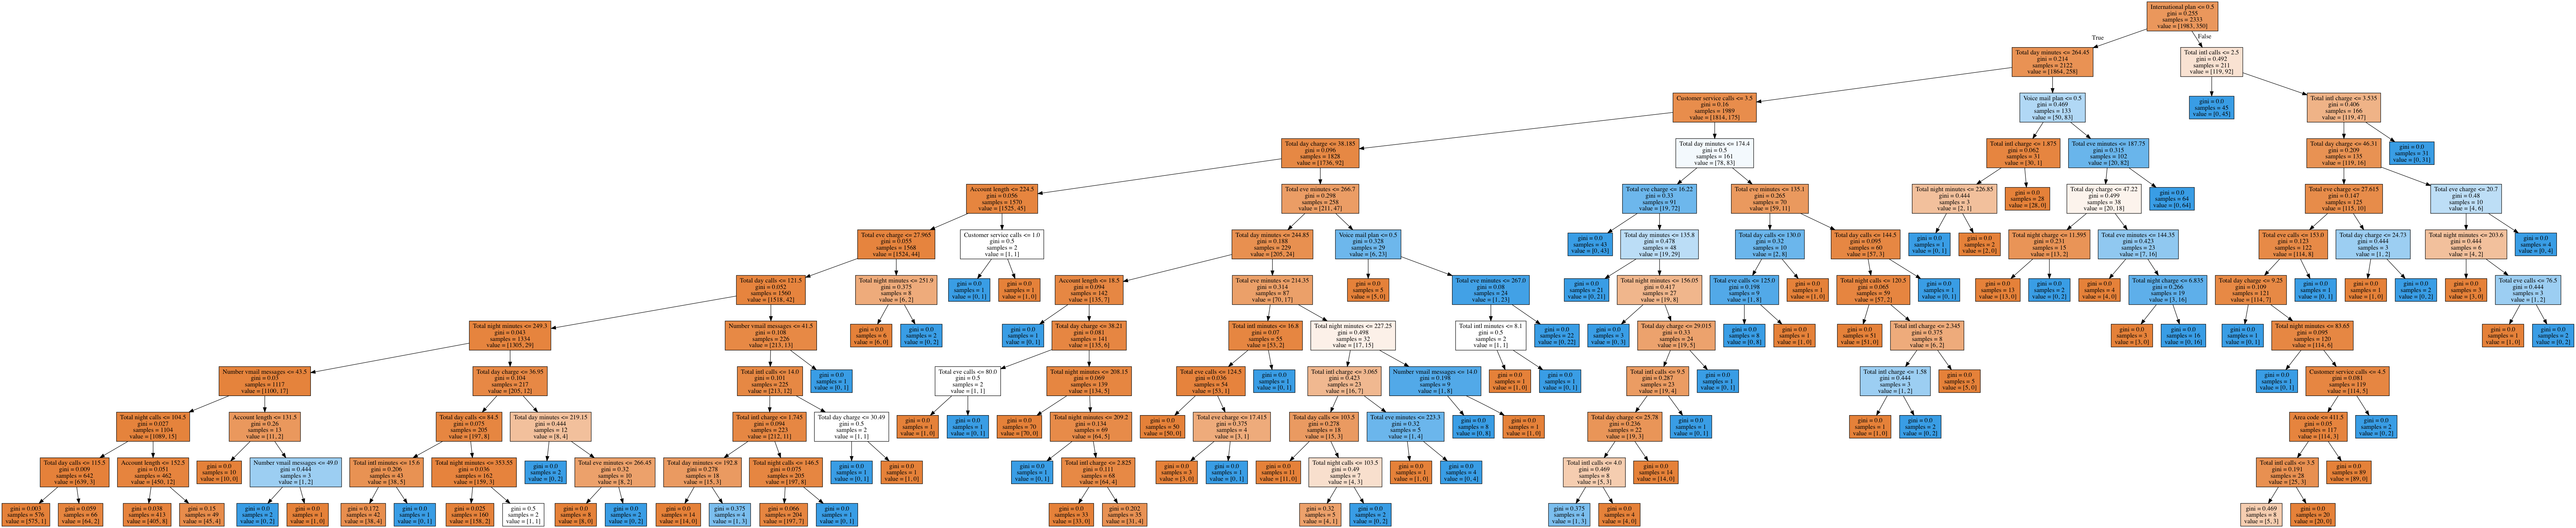

In [139]:
export_graphviz(tree_grid.best_estimator_, feature_names=df.columns, out_file='img/churn_tree.dot', filled=True)

(graph,) = pydot.graph_from_dot_file('img/churn_tree.dot')
graph.write_png('img/churn_tree.png')
display(Image('img/churn_tree.png', unconfined=True))

#### Сложный случай для деревьев решений

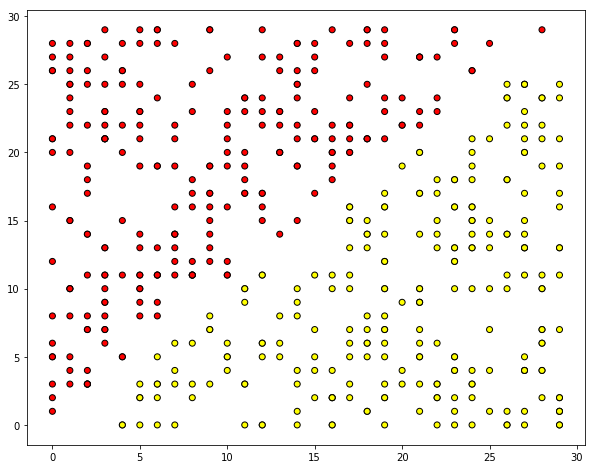

In [140]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

Однако дерево решений строит уж больно сложную границу и само по себе оказывается глубоким. Кроме того, представьте, как плохо дерево будет обобщаться на пространство вне представленного квадрата 30х30, обрамляющего обучающую выборку.

Text(0.5,1,'Easy task. Decision tree complexifies everything')

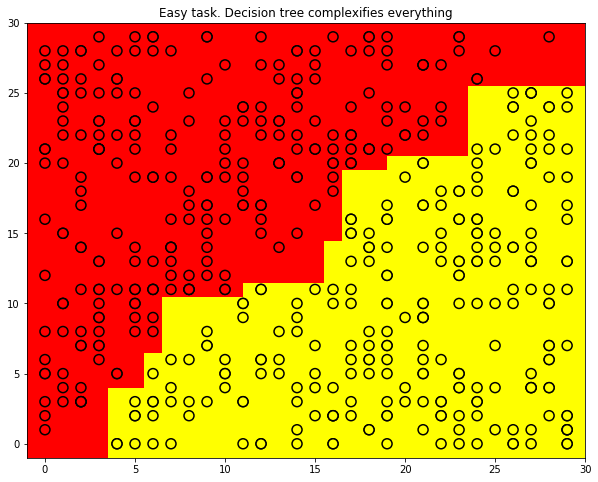

In [145]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn', edgecolors='black', linewidths=1.5)
plt.title('Easy task. Decision tree complexifies everything')

#### Деревья решений и метод ближайших соседей в задаче распознавания рукописных цифр MNIST

In [67]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X.shape

(1797, 64)

In [68]:
X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

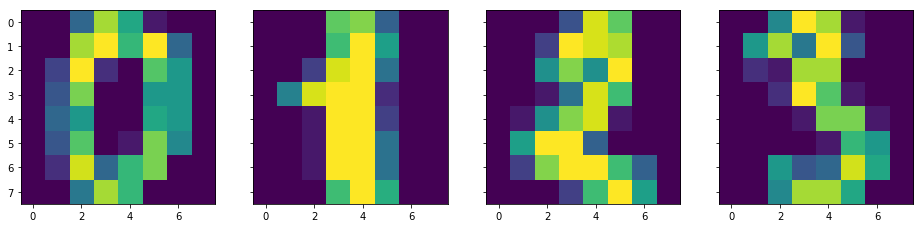

In [69]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]))

#### Далее проведем ровно такой же эксперимент, как и в прошлой задаче, только диапазоны изменения настраиваемых параметров будут немного другие.

In [70]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

#### Обучим дерево решений и kNN, опять параметры пока наугад берем.

In [71]:
from sklearn.tree import DecisionTreeClassifier


In [72]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [73]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, tree_pred), accuracy_score(y_holdout, knn_pred)

(0.6666666666666666, 0.9740740740740741)

#### Теперь так же, как раньше настроим параметры моделей на кросс-валидации, только учтем, что признаков сейчас больше, чем в прошлой задаче — 64.



In [74]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64], 
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params, cv=5,n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64], 'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [75]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 20, 'max_features': 64}, 0.8440731901352426)

#### Метод ближайших соседей на этом наборе данных работает лучше. В случае одного ближайшего соседа на кросс-валидации достигается почти 99% угадываний.

In [76]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

0.9865458422397149

#### Обучим на этих же данных случайный лес, он на большинстве выборок работает лучше, чем метод ближайших соседей. Но сейчас у нас исключение.

In [77]:
from sklearn.ensemble import RandomForestClassifier
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_train, y_train, cv=5))

0.9349085619110404

#### Вы будете правы, если возразите, что мы тут не настраивали параметры RandomForestClassifier, но даже с настройкой доля правильных ответов не достигает 98%, как для у метода одного ближайшего соседа.

#### Результаты на отложенной выборке:

In [78]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.8388888888888889

In [81]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
accuracy_score(y_holdout, knn.predict(X_holdout))

0.9833333333333333

In [82]:
rf = RandomForestClassifier(random_state=17)
rf.fit(X_train, y_train)
accuracy_score(y_holdout, rf.predict(X_holdout))

0.9407407407407408

#### Вывод по этому эксперименту (и общий совет): вначале проверяйте на своих данных простые модели – дерево решений и метод ближайших соседей, может оказаться, что уже они работают достаточно хорошо.

### Сложный случай для метода ближайших соседей

#### В задаче классификации один из признаков будет просто пропорционален вектору ответов, но методу ближайших соседей это не поможет.

In [94]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)
    # первый признак пропорционален целевому
    x1 = 0.3 * y
    # остальные признаки – шум
    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

X, y = form_noisy_data()

In [95]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

#### Как обычно, будем смотреть на долю правильных ответов на кросс-валидации и на отложенной выборке. Построим кривые, отражающие зависимость этих величин от параметра n_neighbors в методе ближайших соседей. Такие кривые называются кривыми валидации.

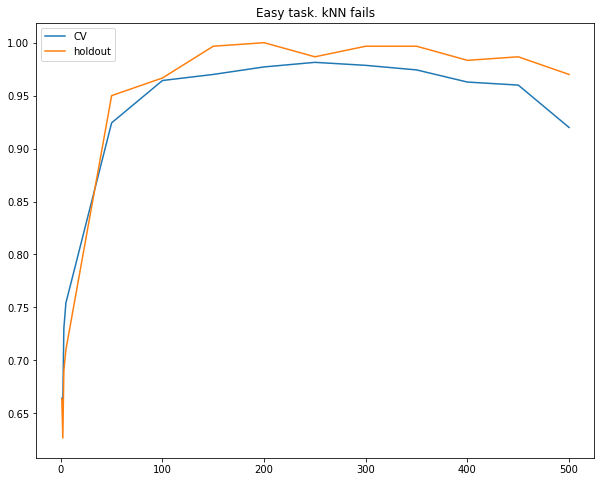

In [96]:
from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    knn.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn.predict(X_holdout)))
    
plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Easy task. kNN fails')
plt.legend()

In [97]:
tree = DecisionTreeClassifier(max_depth=1, random_state=17)
cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))

tree.fit(X_train, y_train)
holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))

cv_score, holdout_score

(1.0, 1.0)

#### Итак, во втором примере дерево справилось с задачей идеально, а метод ближайших соседей испытал трудности. Впрочем, это минус скорее не метода, а используемой евклидовой метрики: в данном случае она не позволила выявить, что один признак намного лучше остальных.